##GENDER INCOME GAP

you may know that it is estimated that women earn about 78% of men in the same job position. 
Can we test that on NYC income data? Can we turn that into a prediction: if you get hired at a certain stipend as a men, what should you expect to make as a woman? (or from the point of view of a job employer, perhaps not one with a very strong moral compass, what should I offer a woman job candidate, given what I would offer a man for the same job?)




In [35]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from scipy import stats
from pandas.tools.plotting import scatter_matrix

import requests
s = requests.get('https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json').json()
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


the Census data on income
http://www.census.gov/hhes/www/cpstables/032015/perinc/pinc03_000.htm

unfortunately a lot of the links that i originally used a few weeks ago are broken now. I posted the data I had used on the class webpage here (together with data for the buildings & energy homework): http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data

In [36]:
#to use the url just pas it to pandas read_excell
url="http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/"
#split your data by male and female, for example you can load the data into 2 disctionary. other variables may be relevant: for example race.
#the names are not informative, and i am not giving you any meta data to find out what is in each file. 
# 08_2 files are male, 08_3 are female, and I am leaving in the lines of code that read the male files into races

allmales={}
allfemales={}
allmales['all']=pd.read_excel(url+'/pinc08_2_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allmales['white']=pd.read_excel(url+'/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(url+'/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(url+'/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(url+'/pinc08_2_1_8.xls', header=9)

allfemales['all']=pd.read_excel(url+'/pinc08_3_1_1.xls',header=9)#%s/pinc03_2_1_1.xls'%url, header=9)
allfemales['white']=pd.read_excel(url+'/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(url+'/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(url+'/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(url+'/pinc08_3_1_8.xls', header=9)



## I. exploratory phase

In [37]:
for key in allmales:
    print key, len(allmales[key])

hispanic 49
all 49
black 49
white 49
asian 49


In [38]:
allmales['all']

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,108706,4407,2665,3200,4027,4418,3333,5027,3807,...,513,626,457,12003,35228,211,50779,447,0.501,0.0033
2,Earnings,83555,3217,2326,2560,1964,3118,1505,3451,1959,...,246,559,259,10113,39903,437,54086,531,0.489,0.0039
3,..Wages and Salary,78263,2779,2184,2419,1780,2777,1365,3149,1847,...,244,540,257,9392,40298,167,54268,543,0.483,0.004
4,..Nonfarm Self-Employment,7014,1478,280,342,231,556,144,377,122,...,0,18,0,516,19557,1391,34247,1291,0.63,0.0092
5,..Farm Self-Employment,1518,804,62,66,26,75,15,70,14,...,0,2,3,83,2359,106,20918,2837,0.82,0.0168
6,Social Security,21454,555,859,919,1784,2250,3063,3329,3282,...,0,0,0,0,15974,96,15892,86,0.237,0.0028
7,SSI (Supplemental Security Income),2667,298,283,447,1041,225,126,78,78,...,0,0,0,0,8232,95,8374,174,0.298,0.0113
8,Public Assistance,456,312,97,30,12,2,2,0,0,...,0,0,0,0,1829,117,2123,236,0.571,0.0275
9,Veterans Benefits,2899,545,385,250,178,228,189,140,175,...,0,0,0,0,11010,529,14810,487,0.49,0.0094


## lets clean the data

we need to remove additional rows, rename columns and convert everything to numeric

In [39]:
allmales['all'].columns

Index([      u'Characteristic',    u'Total with Income',
       u'$1 to $2,499 or loss',     u'$2,500 to $4,999',
           u'$5,000 to $7,499',     u'$7,500 to $9,999',
         u'$10,000 to $12,499',   u'$12,500 to $14,999',
         u'$15,000 to $17,499',   u'$17,500 to $19,999',
         u'$20,000 to $22,499',   u'$22,500 to $24,999',
         u'$25,000 to $27,499',   u'$27,500 to $29,999',
         u'$30,000 to $32,499',   u'$32,500 to $34,999',
         u'$35,000 to $37,499',   u'$37,500 to $39,999',
         u'$40,000 to $42,499',   u'$42,500 to $44,999',
         u'$45,000 to $47,499',   u'$47,500 to $49,999',
         u'$50,000 to $52,499',   u'$52,500 to $54,999',
         u'$55,000 to $57,499',   u'$57,500 to $59,999',
         u'$60,000 to $62,499',   u'$62,500 to $64,999',
         u'$65,000 to $67,499',   u'$67,500 to $69,999',
         u'$70,000 to $72,499',   u'$72,500 to $74,999',
         u'$75,000 to $77,499',   u'$77,500 to $79,999',
         u'$80,000 to $82,499',

In [40]:
def cleanDF(df):
    #rename columns
    df = df.rename(columns={u'Unnamed: 44': 'Median_sdt', u'Unnamed: 46': 'Mean_sdt', u'Unnamed: 48':'Gini_sdt'})
    
    #    remove first row, and I guess we can remove combinations
    df = df.ix[1:38].set_index(u'Characteristic')

    # convert everythin to nomeric and return
    return df.convert_objects(convert_numeric=True)

    

### now lets clean all

In [41]:
for key in allmales:
    allmales[key] = cleanDF(allmales[key])
    allfemales[key] = cleanDF(allfemales[key])

/Users/casy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


## II. Now lets do matrix

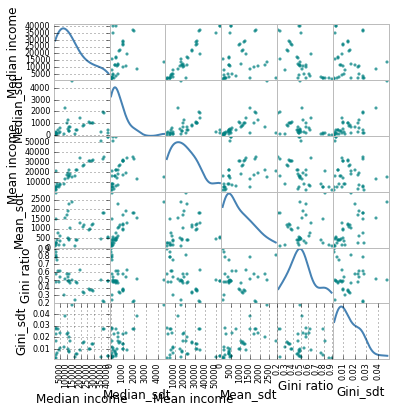

In [42]:
#lest see what is in the data

scatter_matrix(allmales['all'].ix[:,-6:].copy() , figsize=(6, 6), alpha=0.6, diagonal='kde', color=['teal']);

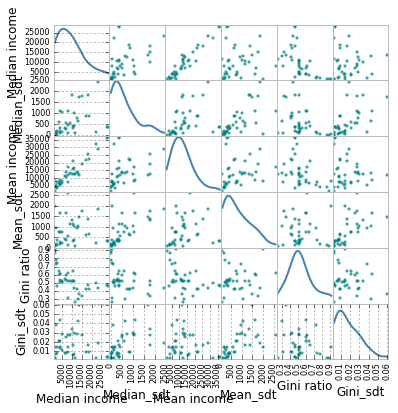

In [43]:
scatter_matrix(allfemales['all'].ix[:,-6:].copy() , figsize=(6, 6), alpha=0.6, diagonal='kde', color='teal');

##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

## income comparison
first let's aggregate all data we gonna use

In [44]:
races  = []
for key in allmales:
    m_income = allmales[key]['Median income']
    f_income = allfemales[key]['Median income']
    tdf = pd.concat([m_income, f_income], axis=1)
    tdf['race']=key
    tdf.columns=['m_income','f_income','race']
    tdf= tdf.reset_index()

    races.append(tdf)

mIncome = pd.concat(races)
mIncome = mIncome.dropna(how='any').reset_index()
print len(mIncome)

138


In [45]:
# mIncome.reset_index()
print mIncome.head(2)

   index Characteristic  m_income  f_income      race
0      0      ....Total     25411     17762  hispanic
1      1       Earnings     26914     21261  hispanic


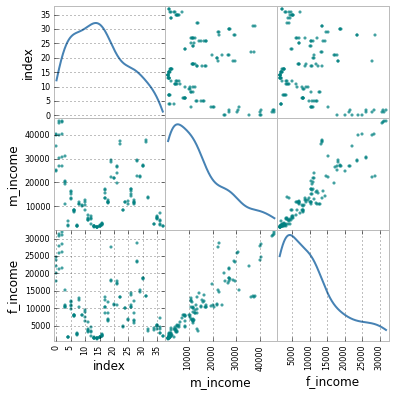

In [46]:
scatter_matrix(mIncome, figsize=(6, 6), alpha=0.6, diagonal='kde', color='teal');

#### Now lets create a subset using only Total Income

In [47]:
total = mIncome[mIncome.Characteristic == '....Total']
len(total)

5

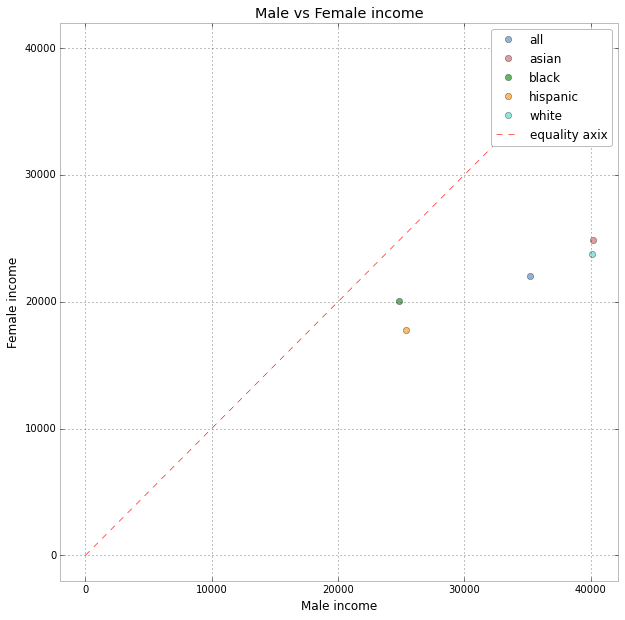

In [48]:
groups = total.groupby('race')

# Plot
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.m_income, group.f_income, marker='o',  linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('Female income')
ax.set_xlabel('Male income')
ax.set_title('Male vs Female income')

ax.plot([0, 40000], [0, 40000], color='r', linestyle='--', linewidth=.6, label='equality axix')
ax.legend(numpoints=1);

In [49]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [50]:
len(total)

5

In [51]:
X = np.reshape(total['m_income'], (len(total),1))
y = np.reshape(total['f_income'], (len(total),1))
print X.shape

(5, 1)


In [52]:
lm.fit(X,y)
print('Coefficients: \n', lm.coef_)

('Coefficients: \n', array([[ 0.35314068]]))


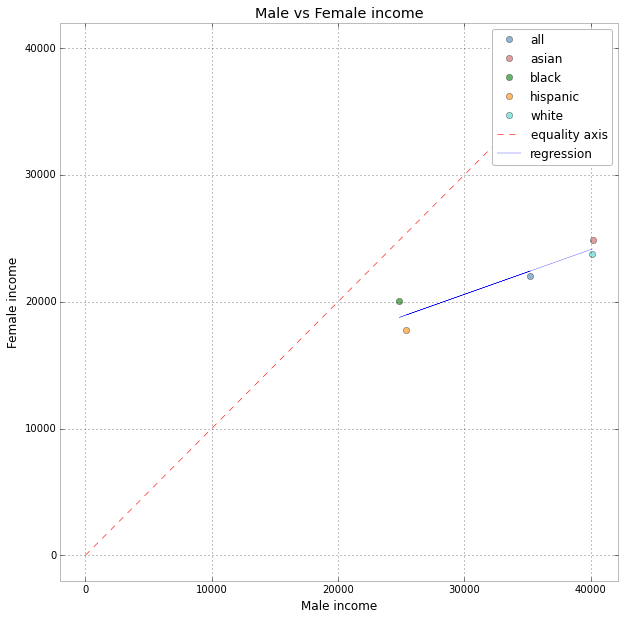

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.m_income, group.f_income, marker='o',  linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('Female income')
ax.set_xlabel('Male income')
ax.set_title('Male vs Female income')

ax.plot([0, 40000], [0, 40000], color='r', linestyle='--', linewidth=.6, label='equality axis') ## equality axis
ax.plot(X, lm.predict(X), color='blue',linestyle='-', linewidth=.3, label='regression') ## least square model
ax.legend(numpoints=1);


## Analitical solution
it turns out that there is an analytical solution for the OLS regression it is coded below. please try to read the code and understand the formula! 


In [54]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)


cor = stats.spearmanr(total['m_income'], total['f_income'])

beta1=cor[0]*total['f_income'].std()/total['m_income'].std()
beta0=total['f_income'].mean()-beta1*total['m_income'].mean()

print beta1
print beta0

0.338176888526
10485.9510732


and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

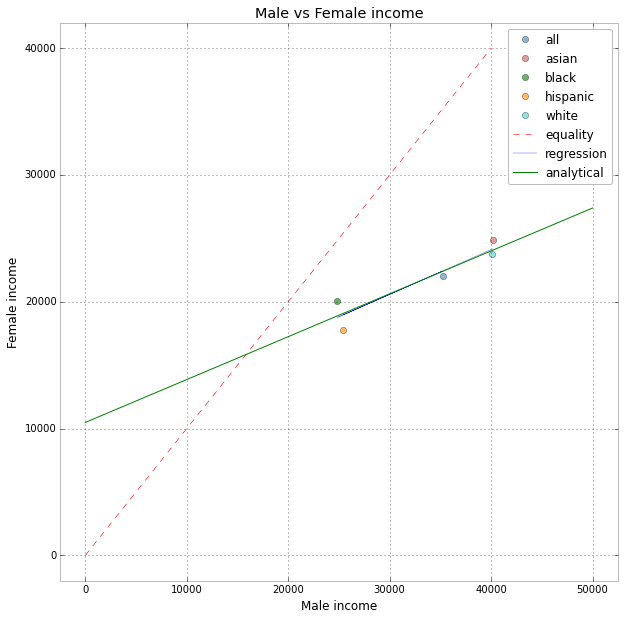

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group.m_income, group.f_income, marker='o',  linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('Female income')
ax.set_xlabel('Male income')
ax.set_title('Male vs Female income')

ax.plot([0, 40000], [0, 40000], color='r', linestyle='--', linewidth=.6,  label='equality') ## equality axis
ax.plot(X, lm.predict(X), color='blue',linestyle='-', linewidth=.3, label='regression') ## least square model
ax.plot([0, 50000], [beta0, beta0+ 50000*beta1], color='g', linestyle='-', linewidth=1, label='analytical') ## analytical
ax.legend()
ax.legend(numpoints=1);

# Working on all types of income now

In [56]:
X = np.reshape(mIncome['m_income'], (len(mIncome),1))
y = np.reshape(mIncome['f_income'], (len(mIncome),1))
print X.shape

(138, 1)


In [57]:
lm.fit(X,y)
print('Coefficients: \n', lm.coef_)

('Coefficients: \n', array([[ 0.60567642]]))


In [58]:
#this is the analytical best regression line. it can be proved (ask me about it if you want!)

cor = stats.spearmanr(mIncome['m_income'], mIncome['f_income'])

beta1=cor[0]*mIncome['f_income'].std()/mIncome['m_income'].std()
beta0=mIncome['f_income'].mean()-beta1*mIncome['m_income'].mean()

print beta1
print beta0

0.6255193358
1113.16612684


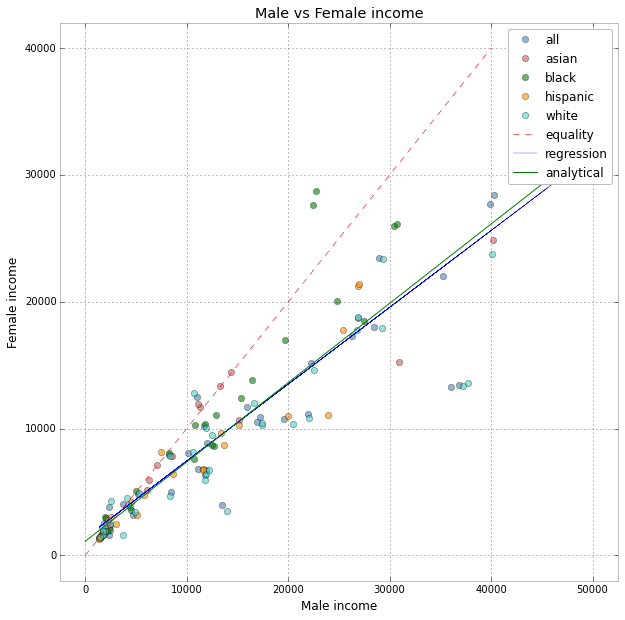

In [59]:
groups = mIncome.groupby('race')

fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.m_income, group.f_income, marker='o',  linestyle='', ms=6, alpha=.6, label=name )

ax.set_ylabel('Female income')
ax.set_xlabel('Male income')
ax.set_title('Male vs Female income')

ax.plot([0, 40000], [0, 40000], color='r', linestyle='--', linewidth=.6,  label='equality') ## equality axis
ax.plot(X, lm.predict(X), color='blue',linestyle='-', linewidth=.3, label='regression') ## least square model
ax.plot([0, 50000], [beta0, beta0+50000*beta1], color='g', linestyle='-', linewidth=1, label='analytical') ## analytical
ax.legend()
ax.legend(numpoints=1);

In [60]:
#is the line fit similar? can you find any high legverage points?

## Predicting a woman salary from Men's one

In [61]:
m = 75000 # randomly selected income
w = lm.predict(m)[0,0]
# print w
print "on the same position as men (%d dollars/year) woman on average will get only %d ( %d percents of men's income)" % (m,w, 100*w/m)


on the same position as men (75000 dollars/year) woman on average will get only 46819 ( 62 percents of men's income)


However, same time we can see that unequality tends to decrease with the decrease of men income, in other words, poor people are more equaly poor.

## lastly do you have any comments about what these data tell us about race? how you would go about analyzing race differences with these data? (just a few sentences)

It's quite interesting how different races have different patterns of income. From my point of view, I'd be interested in looking for different income ratio for different stratas of population for each race.

**But first of all, It is quite interesting to see what is behind each type of income**

In [62]:
def annotate_plot(frame, label_col, plot_col1,plot_col2, **kwargs):
    for label, x, y in zip(frame[label_col], frame[plot_col1], frame[plot_col2]):
        plt.annotate(label, xy=(x, y), **kwargs)

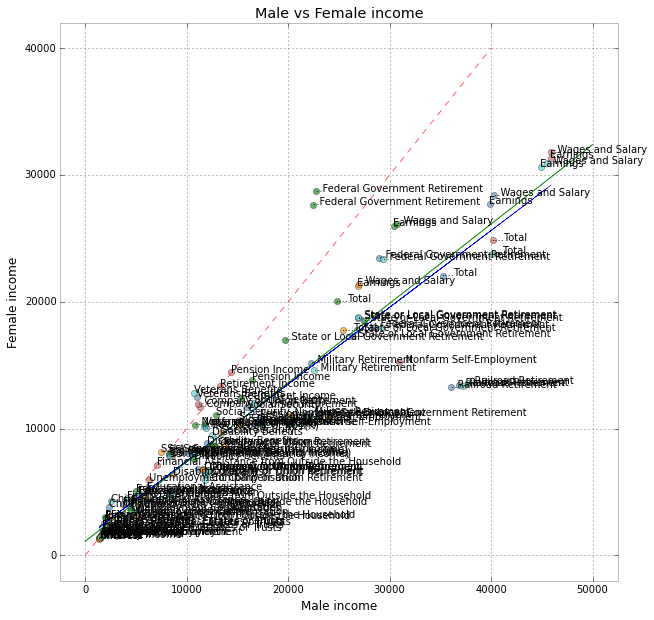

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling


for name, group in groups:
    ax.plot(group.m_income, group.f_income, marker='o',  linestyle='', ms=6, alpha=.6, label=name )
    annotate_plot(group, 'Characteristic', 'm_income', 'f_income') 


ax.set_ylabel('Female income')
ax.set_xlabel('Male income')
ax.set_title('Male vs Female income')

ax.plot([0, 40000], [0, 40000], color='r', linestyle='--', linewidth=.6,  label='equality') ## equality axis
ax.plot(X, lm.predict(X), color='blue',linestyle='-', linewidth=.3, label='regression') ## least square model
ax.plot([0, 50000], [beta0, beta0+50000*beta1], color='g', linestyle='-', linewidth=1, label='analytical'); ## analytical
# ax.legend(numpoints=1);

There are two interesting cases catching eyes: two green dots above all others (I don't really understand why there are two with same label anc color) representig Federal Government Retirement (it probobly adds something for mothers, thats why it is ABOVE equality axis)

Same time, there are four other points, situated almost simmetrically in relation to our regression model, which are Railroad  retirements. This tells us two things at a time: 

- first, that railroad industry is quite male-oriented (meaning, men and wemen have different positions, men tend to have positions with larger salaries_
- second: as 'all' points are almost at the same position as 'white', this mean that almost all railroad workers must be white